# Image Intensity Transformations

Images can be manipulated broadly at two different levels:
* Position
* Intensity

The transformations in this notebook modify the intensity values of each pixel, but leaves the position untouched.

Let's do some filtering examples.

# Common Code
The following code will be used along the rest of the notebook, please make sure you execute each kernel.

In [1]:
import numpy as np
import cv2
import scipy.signal
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from ipywidgets import interact, interactive
import ipywidgets as widgets

## Moving Average Filter

The MA filter computes the average over a window. As such it is a low pass filter. For example a $3\times 3$ MA filter is represented by:

\begin{equation*}
h(x,y) = \frac{1}{W\cdot H}\begin{bmatrix}
1 & 1 & 1\\
1 & 1 & 1\\
1 & 1 & 1\\
\end{bmatrix}
\end{equation*}

where $W$ and $H$ are 3 each.

### Using convolution manually

The following uses scipy convolution2d to implement a moving average filter.

* What is happening with the border?
* How would you fix it?
* What are the "full", "valid", and "same" arguments?

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

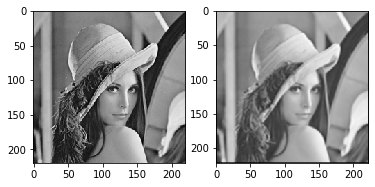

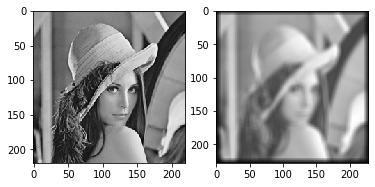

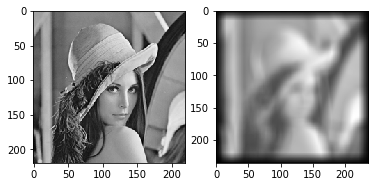

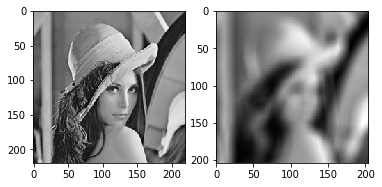

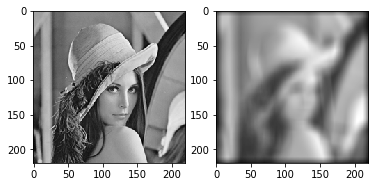

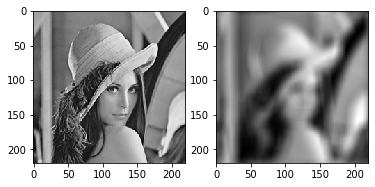

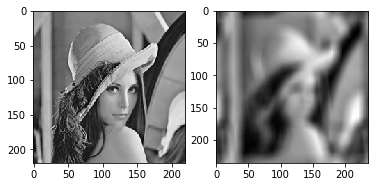

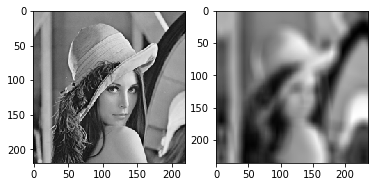

In [2]:
@interact(ksize=widgets.IntSlider(min=3,max=21,step=2,value=3,continuous_update=False),
          mode=["full", "valid", "same"],
          boundary=["fill", "wrap", "symm"],
         )
def t(ksize, mode, boundary):
    img = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)
    
    size = (ksize, ksize)
    kernel = np.ones(size)*1/(ksize*ksize)
    #print(kernel)
    
    dst = scipy.signal.convolve2d (img, kernel, mode, boundary)
    print("Input size:", img.shape)
    print("Output size:", dst.shape)
    
    plt.subplot("121")
    plt.imshow(img, cmap='gray')
    plt.subplot("122")
    plt.imshow(dst, cmap='gray')


### Experiment with Different Kernels
Go ahead and change the kernel to see the different effects. Try to, at least, test the following:
* Unitary impulse
* \begin{equation*}
\begin{pmatrix} 1 & 0 & 0\\ 0 & 0 & 0\\ 0 & 0 & 0 \end{pmatrix}
\end{equation*}
* Sobel X
* Sobel Y
* Sobel Magnitude

Input size: (220, 220)
Output size: (222, 222)


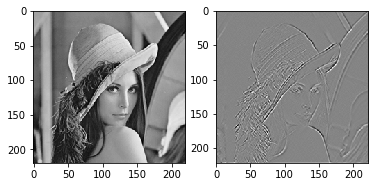

In [23]:
img = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)

unitary_kernel = [
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
]

sobelx_kernel = [
    [-1, 0, 1],
    [-2, 1, 2],
    [-1, 0, 1]
]

sobely_kernel = [
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
]

sobel_mag = np.matmul(sobely_kernel, sobelx_kernel)

kernel = sobel_mag

dst = scipy.signal.convolve2d (img, kernel, "full", "fill")
print("Input size:", img.shape)
print("Output size:", dst.shape)
    
plt.subplot("121")
plt.imshow(img, cmap='gray')
plt.subplot("122")
plt.imshow(dst, cmap='gray')

### Opencv Filter2D


The following code implements a moving average filter using OpenCV's filter2D.

https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html

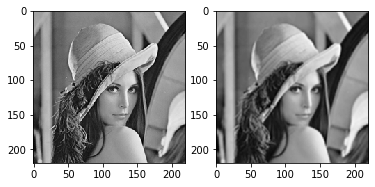

In [11]:
@interact(ksize=widgets.IntSlider(min=3,max=21,step=2,value=3,continuous_update=False))
def t(ksize):
    img = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)
    size = (ksize, ksize)
    kernel = np.ones(size)*1/(ksize*ksize)
    #print(kernel)
    
    dst = cv2.filter2D (img, -1, kernel)
    
    plt.subplot("121")
    plt.imshow(img, cmap='gray')
    plt.subplot("122")
    plt.imshow(dst, cmap='gray')

### OpenCV Blur

The following code implements a moving average filter using OpenCV's blur.

https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html

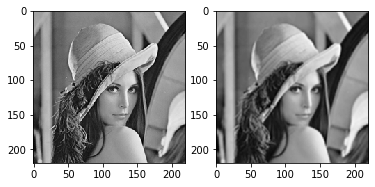

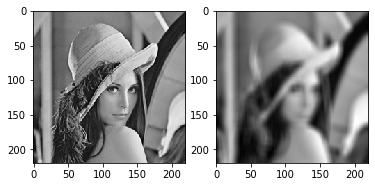

In [5]:
@interact(ksize=widgets.IntSlider(min=3,max=21,step=2,value=3,continuous_update=False))
def t(ksize):
    img = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)
    
    size = (ksize, ksize)
    dst = cv2.blur(img, size)

    plt.subplot("121")
    plt.imshow(img, cmap='gray')
    plt.subplot("122")
    plt.imshow(dst, cmap='gray')

## Gaussian Blur
The Gaussian Blur is a low pass filter with coefficients generated by the Gaussian Bell.

* Why isn't the image blurring? The kernel size is huge!!!

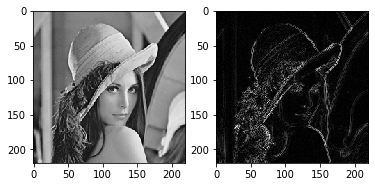

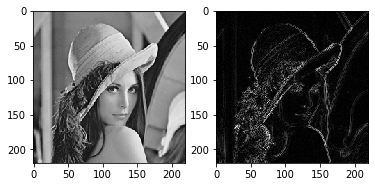

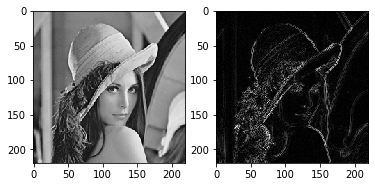

In [37]:
@interact(ksize=widgets.IntSlider(min=3,max=51,step=2,value=3,continuous_update=False))
def t(ksize):
    img = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)

    sigma = 0.5
    size = (ksize,ksize)
    
    dst = cv2.GaussianBlur(img, size, sigma)
    
    dst = cv2.Laplacian(dst, ksize)
    
    dst = abs(dst)

    plt.subplot("121")
    plt.imshow(img, cmap='gray')
    plt.subplot("122")
    plt.imshow(dst, cmap='gray')

### Separable Kernel
Some kernels are said to be separable. The gaussian kernel is separable, hence it may be executed more efficiently.

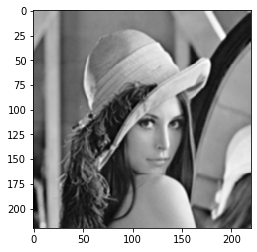

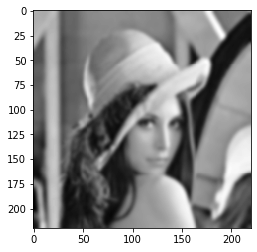

In [7]:
@interact(ksize=widgets.IntSlider(min=3,max=21,step=2,value=3,continuous_update=False))
def t(ksize):
    img = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)
    rows,cols = img.shape

    # Always compute the sigma according to the size, or viceversa
    sigma = 0.3*((ksize-1)*0.5 - 1) + 0.8
    kernel = cv2.getGaussianKernel(ksize, sigma)
    print(kernel)
    
    dst = cv2.sepFilter2D(img,-1,kernel,kernel)

    plt.imshow(dst, cmap='gray')

### Practice
Implement the gaussian filter but using filter2D

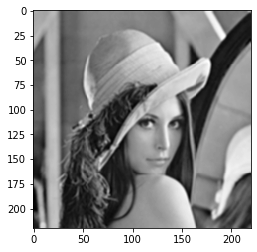

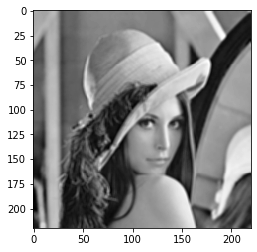

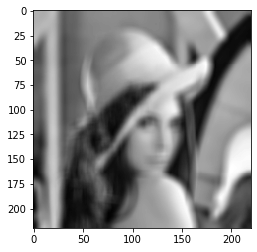

In [34]:
@interact(ksize=widgets.IntSlider(min=3,max=21,step=2,value=3,continuous_update=False),
          sigma=widgets.IntSlider(min=1,max=100,step=2,value=1,continuous_update=False))
def t(ksize, sigma):
    img = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)

    size = (ksize, ksize)
    
    kernel = cv2.getGaussianKernel(ksize, sigma)
    print(kernel)
    
    kernel = np.matmul(kernel, np.transpose(kernel))
    
    dst = cv2.filter2D (img, -1, kernel)
    
    plt.imshow(dst, cmap='gray')

## Laplacian Filter
The laplacian filter measures *edgeness* in an image. Since its a high pass filter it's very suceptible to noise. Hence, it's important to filter the image using a Gaussian (for example) first, and then computes the filters.

* Compute the [Laplacian](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gad78703e4c8fe703d479c1860d76429e6) operator on the image and show the borders
* Sharpen an image using
\begin{equation*}
I'(x,y) = I(x,y) + c\nabla^2I(x,y)
\end{equation*}

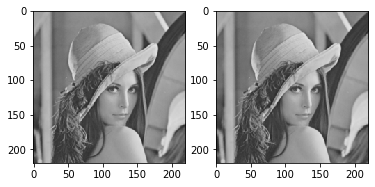

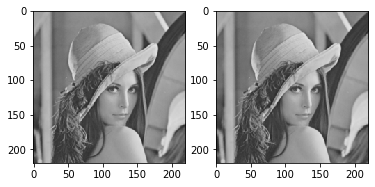

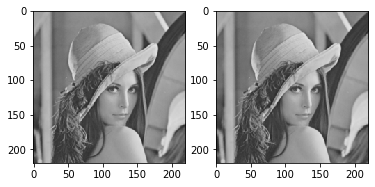

In [38]:
@interact(c=widgets.FloatSlider(min=0,max=1,step=0.05,value=0.5,continuous_update=False),
          ksize=widgets.IntSlider(min=1,max=7,step=2,value=1,continuous_update=False),
          scale=widgets.FloatSlider(min=1,max=3,step=0.1,value=1,continuous_update=False),
          delta=widgets.IntSlider(min=0,max=15,step=1,value=0,continuous_update=False))
def t(c, ksize, scale, delta):
    img = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)
    rows,cols = img.shape

    
    sigma = 0.3*((ksize-1)*0.5 -1) + 0.8
    size = (ksize,ksize)
    img = cv2.GaussianBlur(img, size, sigma)
    
    dst = img
    
    plt.subplot("121")
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot("122")
    plt.imshow(dst, cmap='gray', vmin=0, vmax=255)



### Bilateral Filter
The smoothing filters averages the noise, but in exchange the fade out borders. The bilateral filter extends the Gaussian filter to consider not only nearby pixels, but also nearby values. This filters noise but preserves borders!

\begin{equation*}
I'(x) = \sum_{x_i \in \Omega}G_{\sigma_s}(x_i - x) G_{\sigma_r} (I(x_i) - I(x)) I(x_i)
\end{equation*}

Use OpenCV's [Bilateral Filter](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed) to filter an image.

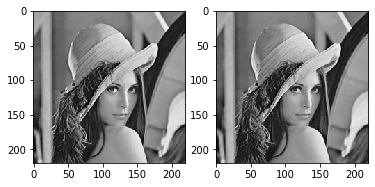

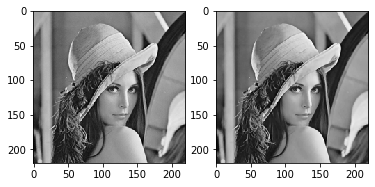

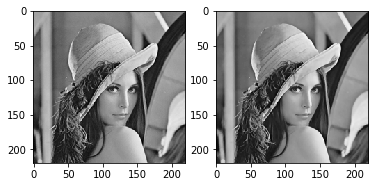

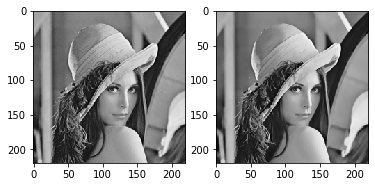

In [44]:
@interact(c=widgets.FloatSlider(min=0,max=1,step=0.05,value=0.5,continuous_update=False),
          ksize=widgets.IntSlider(min=3,max=7,step=2,value=3,continuous_update=False),
          scale=widgets.IntSlider(min=1,max=15,step=2,value=1,continuous_update=False),
          delta=widgets.IntSlider(min=0,max=15,step=1,value=0,continuous_update=False))
def t(c, ksize, scale, delta):
    img = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)
    rows,cols = img.shape

    dst = cv2.bilateralFilter(img, ksize, scale, delta)
    
    plt.subplot("121")
    plt.imshow(img, cmap='gray')
    plt.subplot("122")
    plt.imshow(dst, cmap='gray')
    

## Non-linear rank filters
Rank filters are non-linear filters that, instead of using the convolution, compute the output pixel by performing a ranking calculation over a neighborhood. Some examples are:
* Median filter
* Max filter
* Min filter

### Median filter
Median filter is specially useful for salt&pepper noise. Go ahead and implement a median filter on the noisy lenna.


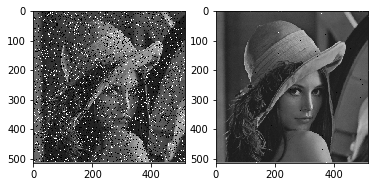

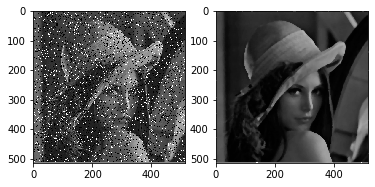

In [46]:
@interact(ksize=widgets.IntSlider(min=3,max=21,step=2,value=3,continuous_update=False))
def t(ksize):
    img = cv2.imread('lenna_noisy.png', cv2.IMREAD_GRAYSCALE)
    rows,cols = img.shape
    
    sigma = 0.3*((ksize-1)*0.5 - 1) + 0.8
    size = (ksize,ksize)
        
    dst = cv2.medianBlur(img, ksize)
    
    
    plt.subplot("121")
    plt.imshow(img, cmap='gray')
    plt.subplot("122")
    plt.imshow(dst, cmap='gray')

Try to perform salt&pepper noise using a Gaussian filter. What do you notice

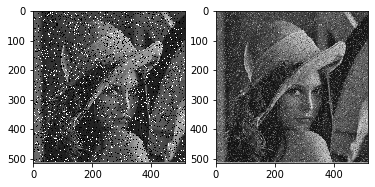

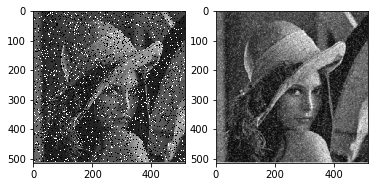

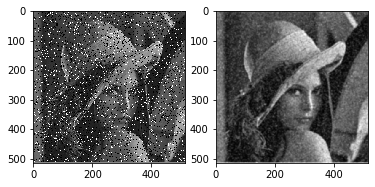

In [47]:
@interact(ksize=widgets.IntSlider(min=3,max=21,step=2,value=3,continuous_update=False))
def t(ksize):
    img = cv2.imread('lenna_noisy.png', cv2.IMREAD_GRAYSCALE)
    rows,cols = img.shape


    sigma = 0.3*((ksize-1)*0.5 -1) + 0.8
    size = (ksize,ksize)
    dst = cv2.GaussianBlur(img, size, sigma)
    
    
    plt.subplot("121")
    plt.imshow(img, cmap='gray')
    plt.subplot("122")
    plt.imshow(dst, cmap='gray')